## 1. Load Data and Packages

In [1]:
## assume working directory is the one that current juno is in
set.seed(1)
dt.path = "Data/BodyFat.csv"
dt.fat = read.csv(dt.path)
body.fat = subset(dt.fat, select = c(-IDNO, -DENSITY))

In [2]:
if(!require("dplyr")){install.packages("dplyr")}
if(!require("tidyverse")){install.packages("tidyverse")}
if(!require("caret")){install.packages("caret")}

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyverse
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v readr   1.3.1
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v ggplot2 3.1.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: caret
Loading required package: lattice

Attaching package: 'caret'

The following object 

## 2. Data Description

In [3]:
summary(dt.fat)

      IDNO           BODYFAT         DENSITY           AGE       
 Min.   :  1.00   Min.   : 0.00   Min.   :0.995   Min.   :22.00  
 1st Qu.: 63.75   1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75  
 Median :126.50   Median :19.00   Median :1.055   Median :43.00  
 Mean   :126.50   Mean   :18.94   Mean   :1.056   Mean   :44.88  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00  
 Max.   :252.00   Max.   :45.10   Max.   :1.109   Max.   :81.00  
     WEIGHT          HEIGHT        ADIPOSITY          NECK      
 Min.   :118.5   Min.   :29.50   Min.   :18.10   Min.   :31.10  
 1st Qu.:159.0   1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40  
 Median :176.5   Median :70.00   Median :25.05   Median :38.00  
 Mean   :178.9   Mean   :70.15   Mean   :25.44   Mean   :37.99  
 3rd Qu.:197.0   3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42  
 Max.   :363.1   Max.   :77.75   Max.   :48.90   Max.   :51.20  
     CHEST           ABDOMEN            HIP            THIGH      
 Min.   : 79.30 

In [4]:
str(dt.fat)

'data.frame':	252 obs. of  17 variables:
 $ IDNO     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ BODYFAT  : num  12.6 6.9 24.6 10.9 27.8 20.6 19 12.8 5.1 12 ...
 $ DENSITY  : num  1.07 1.09 1.04 1.08 1.03 ...
 $ AGE      : int  23 22 22 26 24 24 26 25 25 23 ...
 $ WEIGHT   : num  154 173 154 185 184 ...
 $ HEIGHT   : num  67.8 72.2 66.2 72.2 71.2 ...
 $ ADIPOSITY: num  23.7 23.4 24.7 24.9 25.6 26.5 26.2 23.6 24.6 25.8 ...
 $ NECK     : num  36.2 38.5 34 37.4 34.4 39 36.4 37.8 38.1 42.1 ...
 $ CHEST    : num  93.1 93.6 95.8 101.8 97.3 ...
 $ ABDOMEN  : num  85.2 83 87.9 86.4 100 94.4 90.7 88.5 82.5 88.6 ...
 $ HIP      : num  94.5 98.7 99.2 101.2 101.9 ...
 $ THIGH    : num  59 58.7 59.6 60.1 63.2 66 58.4 60 62.9 63.1 ...
 $ KNEE     : num  37.3 37.3 38.9 37.3 42.2 42 38.3 39.4 38.3 41.7 ...
 $ ANKLE    : num  21.9 23.4 24 22.8 24 25.6 22.9 23.2 23.8 25 ...
 $ BICEPS   : num  32 30.5 28.8 32.4 32.2 35.7 31.9 30.5 35.9 35.6 ...
 $ FOREARM  : num  27.4 28.9 25.2 29.4 27.7 30.6 27.8 29 31.1 30 ...


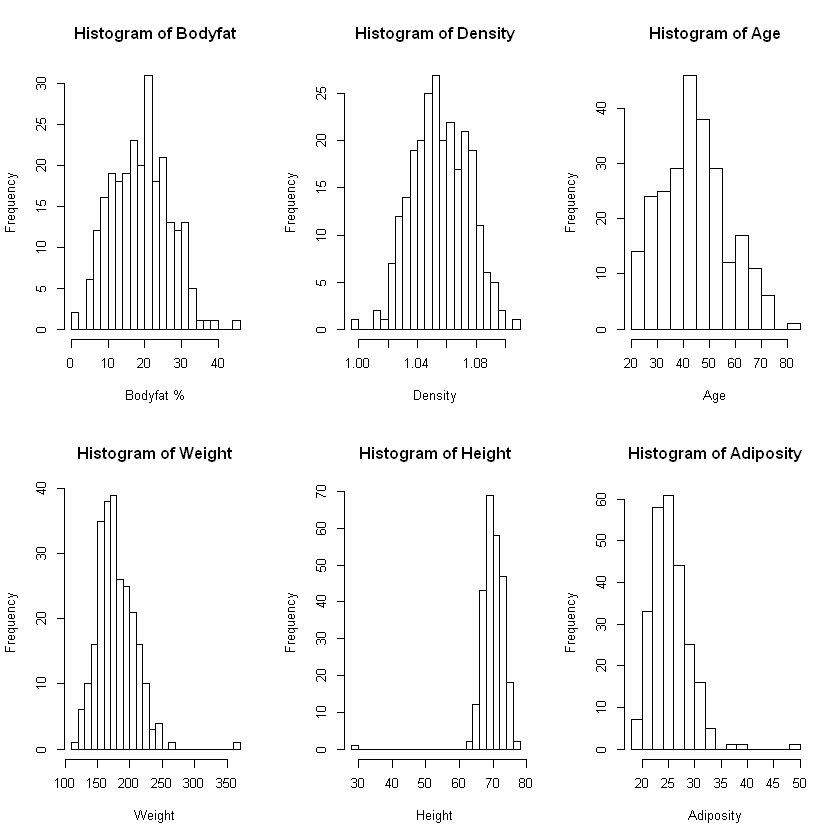

In [5]:
par(mfrow=c(2,3))
hist(dt.fat$BODYFAT,breaks = 20, 
     main = "Histogram of Bodyfat",xlab="Bodyfat %")
hist(dt.fat$DENSITY,breaks = 20, 
     main = "Histogram of Density",xlab="Density")
hist(dt.fat$AGE,breaks = 20, 
     main = "Histogram of Age",xlab="Age")
hist(dt.fat$WEIGHT,breaks = 20, 
     main = "Histogram of Weight",xlab="Weight")
hist(dt.fat$HEIGHT,breaks = 20, 
     main = "Histogram of Height",xlab="Height")
hist(dt.fat$ADIPOSITY,breaks = 20, 
     main = "Histogram of Adiposity",xlab="Adiposity")

## 3. Data Cleaning

Given Siri's equation, we know that
$$B = \frac{495}{D} - 450\ ,\ where$$
* B = proportion of fat tissue * 100 = BODYFAT
* D = Body Density = DENSITY

This formula can be used to find outliers in data. 
The points which bodtfats are not equal to the bodyfat computed by density may be wrong points.
Then we choose top points in terms of the difference between recorded bodyfat and the bodyfat computed by density.

id,diff
96,16.931517
48,7.735021
76,4.208494
182,3.611687
216,2.387437
36,1.850490
192,1.665680
33,1.603191
169,1.547544
205,1.466294


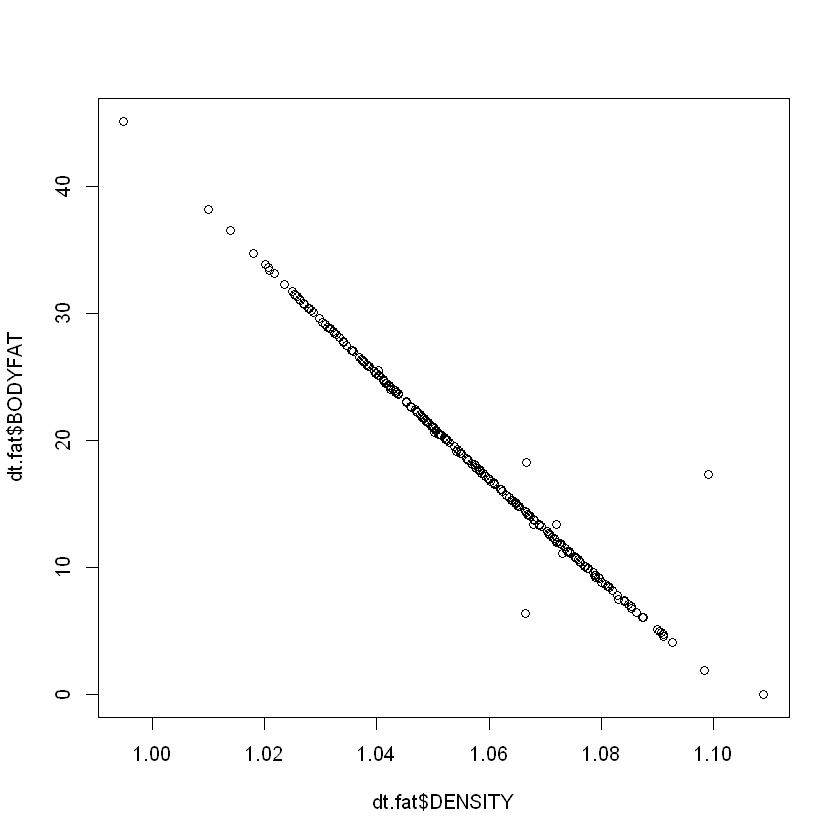

In [6]:
plot(dt.fat$BODYFAT ~ 1/dt.fat$DENSITY)
id<-as.vector(dt.fat$IDNO)
bodyf<-as.vector(dt.fat$BODYFAT)
den<-as.vector(dt.fat$DENSITY)
diff<-abs(bodyf -(495/den-450))
ab<-cbind(id,diff)
ab[order(ab[,2],decreasing = T),][1:10,]

In [7]:
col.mean1 = round(sapply(dt.fat[,-1], dim = 1, FUN = mean), digits = 2)
bd = rbind(dt.fat[c(182,96, 48,54, 76,124), -1], col.mean1)
rownames(bd)[4] = '54 (compared with 48)'
rownames(bd)[6] = '124 (compared with 76)'
rownames(bd)[7] = ' Sample Mean'
bd

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
182,0.00,1.1089,40.00,118.50,68.00,18.10,33.80,79.30,69.40,85.0,47.20,33.50,20.2,27.70,24.60,16.50
96,17.30,1.0991,53.00,224.50,77.75,26.10,41.10,113.20,99.20,107.5,61.70,42.30,23.2,32.90,30.80,20.40
48,6.40,1.0665,39.00,148.50,71.25,20.60,34.60,89.80,79.50,92.7,52.70,37.50,21.9,28.80,26.80,17.90
54 (compared with 48),7.10,1.0848,49.00,152.75,73.50,19.90,35.10,93.30,79.60,91.6,52.60,37.60,22.6,38.50,27.40,18.50
76,18.30,1.0666,61.00,148.25,67.50,22.90,36.00,91.60,81.80,94.8,54.50,37.00,21.4,29.30,27.00,18.30
124 (compared with 76),16.00,1.0623,47.00,151.50,66.75,23.90,36.90,94.00,86.10,95.2,58.10,36.50,22.1,30.60,27.50,17.60
Sample Mean,18.94,1.0600,44.88,178.92,70.15,25.44,37.99,100.82,92.56,99.9,59.41,38.59,23.1,32.27,28.66,18.23


**For No.182:**
No one's bodyfat can be 0. Therefore we should delete this abnormal point(No.182).

**For No.96:**
The bodyfat computed by the density is 495/1.0991-450=0.3684833. It is very close to 0. Therefore we think the density is wrong meanwhile the bodyfat is right. So we will keep this point.

**For No.48:**
We find a normal point(No.54) which is very similar with No.48 point except AGE and BICEPS. But these two aspects influence bodyfat little. Therefore we think the bodyfat of No.48 point is normal. Then we keep this point.

**For No.76:**
We find a normal point(No.124) which is very similar with No.76 point .Therefore we think the bodyfat of No.76 point is normal. Then we keep this point.

We know that adiposity is bmi, which is computed by weight and height.
$$ADIPOSITY = \frac{WEIGHT}{HIGHT^2} $$
But  compared with the adiposity computed by weight and height, there are some points which have the conflicting adiposity values.

In [8]:
id<-as.vector(dt.fat$IDNO)
adi<-as.vector(dt.fat$ADIPOSITY)
weightkg<-as.vector(dt.fat$WEIGHT)*0.453592
hightm<-as.vector(dt.fat$HEIGHT )*0.0254
diff2<-abs(adi -weightkg/(hightm)^2)
ab2<-cbind(id,diff2)
ab2[order(ab2[,2],decreasing = T),][1:10,]

id,diff2
42,135.7180939
163,3.0069082
221,2.8219506
156,0.3064011
235,0.2421971
116,0.2358972
86,0.2304474
46,0.2222699
22,0.1249692
61,0.1032590


From the difference, we can know the recorded values of No.42,163,221 points are wrong. Then we list No.42, No.163 and No.221 as three possible bad points candidates.

In [9]:
# The person with largest bodyfat
dt.fat[dt.fat$BODYFAT==max(dt.fat$BODYFAT), ]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
216,216,45.1,0.995,51,219,64,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


The one with bodyfat 45.1% is too impossible  to exist in the world and his density is smaller than 1. So we delete this example.

In [10]:
# The shortest person's other measurements are normal so we can consider his height is recorded wrongly.
body.fat[body.fat$HEIGHT==min(body.fat$HEIGHT),]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
42,31.7,44,205,29.5,29.9,36.6,106,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


In [11]:
# We can use the BMI formula to impute his real height.
body.fat$HEIGHT[42] = round(sqrt(205*0.45359237/29.9)*39.3700787,1)
body.fat[42,]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
42,31.7,44,205,69.4,29.9,36.6,106,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


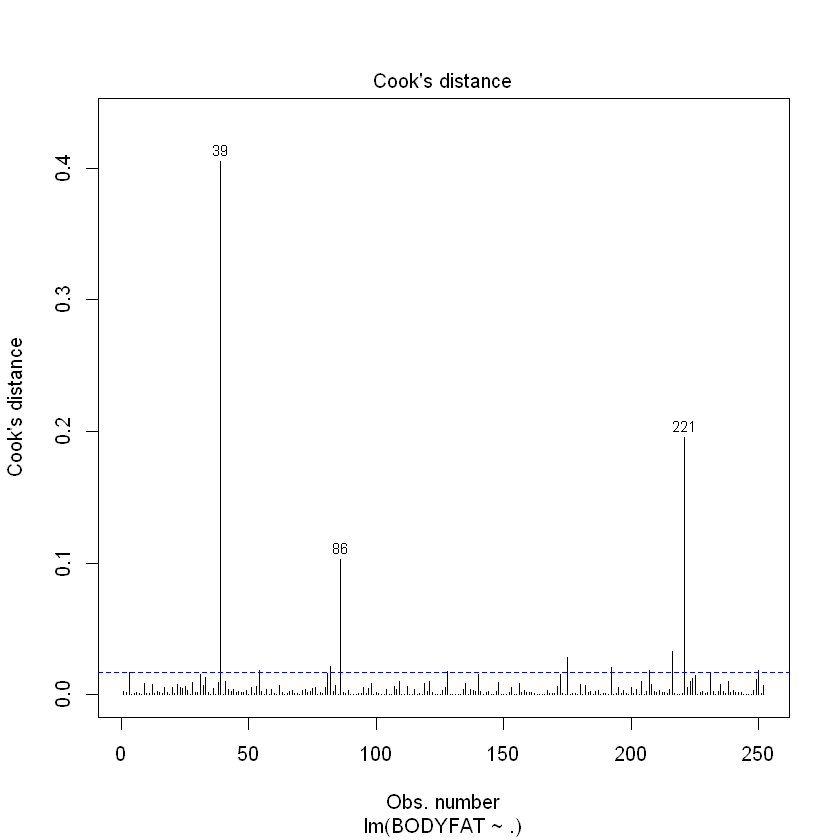

In [12]:
model.clean = lm(BODYFAT ~ ., data = body.fat)
# summary(model.clean)$coefficient
plot(model.clean, which = 4)
abline(h = 4/(dim(body.fat)[1]-dim(body.fat)[2]), lty = 2, col = 'blue')

In [13]:
col.mean = round(sapply(body.fat, dim = 1, FUN = mean), digits = 2)
. = rbind(body.fat[c(39, 86, 221), ], col.mean)
rownames(.)[4] = ' Sample Mean'
.

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,33.80,46.00,363.15,72.25,48.90,51.20,136.20,148.10,147.7,87.30,49.10,29.6,45.00,29.00,21.40
86,25.80,67.00,167.00,67.50,26.00,36.50,98.90,89.70,96.2,54.70,37.80,33.7,32.40,27.70,18.20
221,12.70,54.00,153.25,70.50,24.50,38.50,99.00,91.80,96.2,57.70,38.10,23.9,31.40,29.90,18.90
Sample Mean,18.94,44.88,178.92,70.31,25.44,37.99,100.82,92.56,99.9,59.41,38.59,23.1,32.27,28.66,18.23


* Sample 39 is highly overweighted.However, \#39 is merely a stronger person whose body measurements are within normal range. 
* Sample 86 has relatively larger Cook's distance. However, \#86 is merely a person whose body measurements are within normal range. 
* Sample 221 has normal body measurements and he is a really fit person.

However, \#39, \#86 and \#221 should be kept in our model.

**Given the above, $163, 182, 216$ show up as outlier candidates.**

In [14]:
body.fat.clean = body.fat[-c(163, 182,216),]

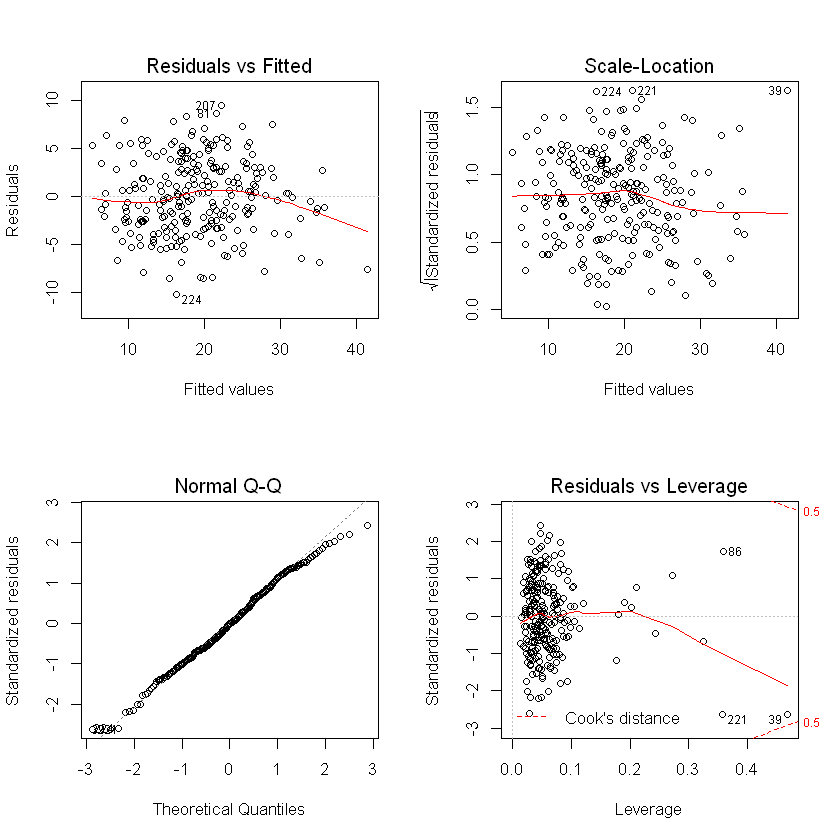

In [15]:
model.clean2 = lm(BODYFAT ~ ., data = body.fat.clean)
layout(matrix(1:4, ncol = 2))
plot(model.clean2)

## 3. Variable Selection

### Linear Model

#### Forward selection using AIC

In [16]:
model.1 <- lm(BODYFAT~1,data = body.fat.clean)
model.AIC.forward <- step(model.1,list(lower = model.1,upper = model.clean2),k = 2,direction = "forward",trace = 0)
summary(model.AIC.forward)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + FOREARM + NECK + 
    BICEPS + AGE + THIGH + HIP, data = body.fat.clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1521  -2.6483  -0.0242   2.7992   9.4679 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.74731   11.06768  -1.784  0.07565 .  
ABDOMEN       0.85672    0.06794  12.610  < 2e-16 ***
WEIGHT       -0.08717    0.03826  -2.279  0.02358 *  
WRIST        -1.36738    0.47545  -2.876  0.00439 ** 
FOREARM       0.41728    0.18125   2.302  0.02218 *  
NECK         -0.45634    0.20978  -2.175  0.03059 *  
BICEPS        0.15282    0.15571   0.981  0.32738    
AGE           0.06043    0.02879   2.099  0.03688 *  
THIGH         0.27626    0.12552   2.201  0.02870 *  
HIP          -0.18777    0.12908  -1.455  0.14706    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.951 on 239 degrees of freedom
Multiple R-squared:  0.7336,	Adj

#### Backward selection using AIC

In [17]:
model.AIC.backward <- step(model.clean2,k = 2,direction = "backward",trace = 0)
summary(model.AIC.backward)


Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + NECK + ABDOMEN + HIP + 
    THIGH + FOREARM + WRIST, data = body.fat.clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1325  -2.7879  -0.1165   2.7325   9.6502 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.28149   11.05665  -1.744  0.08246 .  
AGE           0.06247    0.02871   2.176  0.03056 *  
WEIGHT       -0.07997    0.03755  -2.130  0.03419 *  
NECK         -0.43369    0.20849  -2.080  0.03857 *  
ABDOMEN       0.85266    0.06781  12.574  < 2e-16 ***
HIP          -0.19866    0.12859  -1.545  0.12368    
THIGH         0.30912    0.12096   2.556  0.01122 *  
FOREARM       0.47278    0.17219   2.746  0.00650 ** 
WRIST        -1.35941    0.47535  -2.860  0.00461 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.951 on 240 degrees of freedom
Multiple R-squared:  0.7325,	Adjusted R-squared:  0.7236 
F-statistic: 82.15 on 8 and 240 DF,  

#### Forward selection using BIC

In [18]:
model.BIC.forward <- step(model.1,list(lower = model.1,upper = model.clean2),k = log(dim(body.fat.clean)[1]),direction = "forward",trace = 0)
summary(model.BIC.forward)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + FOREARM, data = body.fat.clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8084 -2.8926 -0.0708  2.8601  8.3356 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -30.86008    6.77840  -4.553 8.36e-06 ***
ABDOMEN       0.90524    0.05301  17.078  < 2e-16 ***
WEIGHT       -0.12356    0.02301  -5.371 1.83e-07 ***
WRIST        -1.33925    0.41283  -3.244  0.00134 ** 
FOREARM       0.43804    0.16831   2.603  0.00982 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.013 on 244 degrees of freedom
Multiple R-squared:  0.7193,	Adjusted R-squared:  0.7147 
F-statistic: 156.3 on 4 and 244 DF,  p-value: < 2.2e-16


#### Backward selection using BIC

In [19]:
model.BIC.backward <- step(model.clean2,k = log(dim(body.fat.clean)[1]),direction = "backward",trace = 0)
summary(model.BIC.backward)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST, data = body.fat.clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8084 -2.8926 -0.0708  2.8601  8.3356 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -30.86008    6.77840  -4.553 8.36e-06 ***
WEIGHT       -0.12356    0.02301  -5.371 1.83e-07 ***
ABDOMEN       0.90524    0.05301  17.078  < 2e-16 ***
FOREARM       0.43804    0.16831   2.603  0.00982 ** 
WRIST        -1.33925    0.41283  -3.244  0.00134 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.013 on 244 degrees of freedom
Multiple R-squared:  0.7193,	Adjusted R-squared:  0.7147 
F-statistic: 156.3 on 4 and 244 DF,  p-value: < 2.2e-16


#### Back/forward selection uing A/BIC

In [20]:
model.full = lm(BODYFAT ~ ., body.fat.clean)

In [21]:
model.aic.both = step(model.full, direction = "both", k = 2, trace = 0)
summary(model.aic.both)


Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + NECK + ABDOMEN + HIP + 
    THIGH + FOREARM + WRIST, data = body.fat.clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1325  -2.7879  -0.1165   2.7325   9.6502 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.28149   11.05665  -1.744  0.08246 .  
AGE           0.06247    0.02871   2.176  0.03056 *  
WEIGHT       -0.07997    0.03755  -2.130  0.03419 *  
NECK         -0.43369    0.20849  -2.080  0.03857 *  
ABDOMEN       0.85266    0.06781  12.574  < 2e-16 ***
HIP          -0.19866    0.12859  -1.545  0.12368    
THIGH         0.30912    0.12096   2.556  0.01122 *  
FOREARM       0.47278    0.17219   2.746  0.00650 ** 
WRIST        -1.35941    0.47535  -2.860  0.00461 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.951 on 240 degrees of freedom
Multiple R-squared:  0.7325,	Adjusted R-squared:  0.7236 
F-statistic: 82.15 on 8 and 240 DF,  

In [22]:
model.bic.both = step(model.full, direction = "both", k = log(dim(body.fat.clean)[1]), trace = 0)
summary(model.bic.both)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST, data = body.fat.clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8084 -2.8926 -0.0708  2.8601  8.3356 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -30.86008    6.77840  -4.553 8.36e-06 ***
WEIGHT       -0.12356    0.02301  -5.371 1.83e-07 ***
ABDOMEN       0.90524    0.05301  17.078  < 2e-16 ***
FOREARM       0.43804    0.16831   2.603  0.00982 ** 
WRIST        -1.33925    0.41283  -3.244  0.00134 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.013 on 244 degrees of freedom
Multiple R-squared:  0.7193,	Adjusted R-squared:  0.7147 
F-statistic: 156.3 on 4 and 244 DF,  p-value: < 2.2e-16


#### Mallow's Cp

In [25]:
#detach("package:car")
install.packages("leaps")
library("leaps") # for leaps()
install.packages("faraway")
library("faraway") # for Cpplot()

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'leaps' is not available (for R version 3.6.1)"

package 'faraway' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pingy\AppData\Local\Temp\Rtmp8cTNj0\downloaded_packages



Attaching package: 'faraway'

The following object is masked from 'package:lattice':

    melanoma



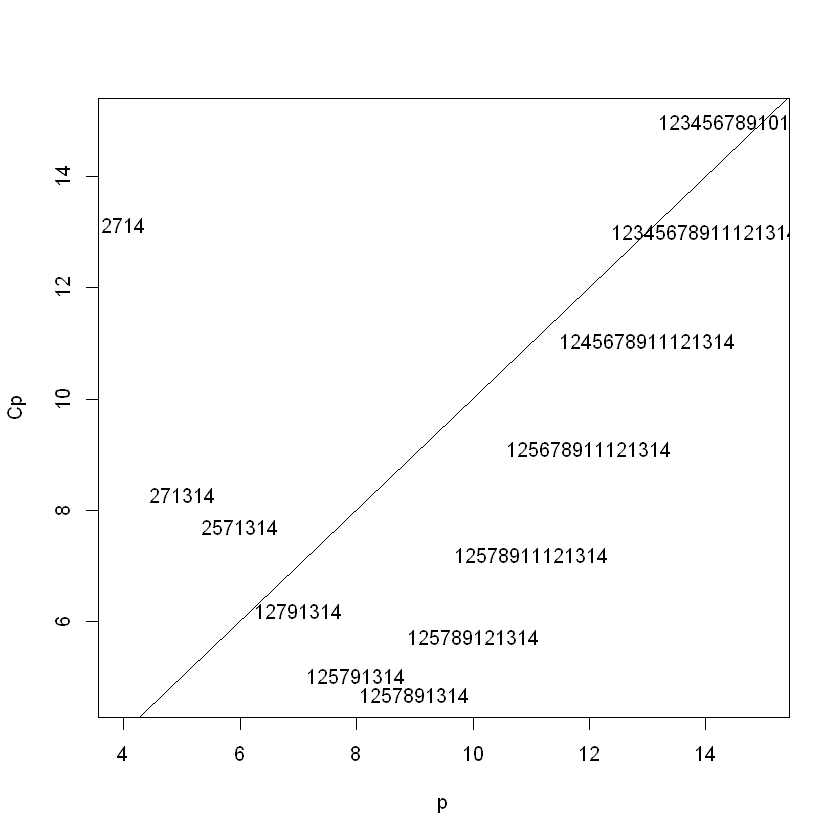

In [26]:
X = model.matrix(model.full)[,-1]
Y = body.fat.clean[,1]
g = leaps::leaps(X,Y,nbest=1)
Cpplot(g) # Include all variable.

#### $R^2$

1     2     3     4     5     6     7     8     9     A     B     C     D 
 TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE 
    E 
 TRUE

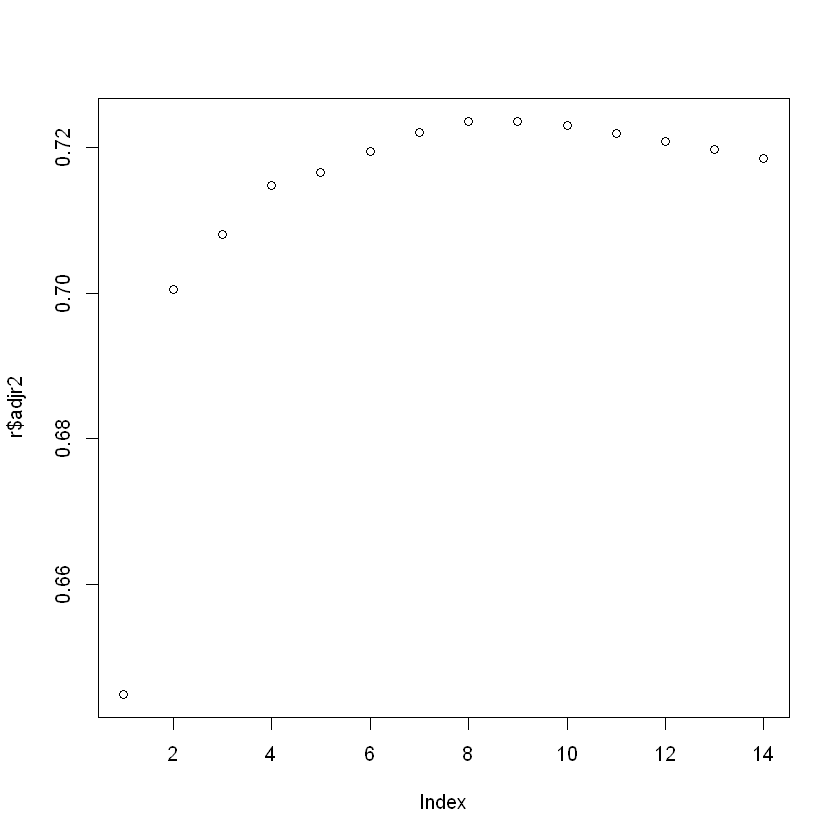

In [27]:
r = leaps::leaps(X,Y,nbest=1, method="adjr2")
plot(r$adjr2)
(r$which)[which(r$adjr2 == max(r$adjr2)),] # 1,2,3,7,12,13

### Fraction Model

$$\text{Bodyfat }= \beta_1 \frac{X_1}{\text{Weight}} + \beta_2 \frac{1}{\text{Weight}} + \beta_3$$

where $X_1$ is chosen from the remaining variables. 

In [28]:
data = body.fat.clean
data.invwei <- data.frame(BODYFAT = data$BODYFAT,HEIGHT = data$HEIGHT/data$WEIGHT,
                          ADIPOSITY = data$ADIPOSITY/data$WEIGHT,NECK = data$NECK/data$WEIGHT,
                          CHEST = data$CHEST/data$WEIGHT,ABDOMEN = data$ABDOMEN/data$WEIGHT,
                          HIP = data$HIP/data$WEIGHT,THIGH = data$THIGH/data$WEIGHT,
                          KNEE = data$KNEE/data$WEIGHT,ANKLE = data$ANKLE/data$WEIGHT,
                          BICEPS = data$BICEPS/data$WEIGHT,FOREARM = data$FOREARM/data$WEIGHT,
                          WRIST = data$WRIST/data$WEIGHT)
data.invwei$inv_wei <- 1/data$WEIGHT

In [29]:
BF.nonlinear = body.fat.clean
kFoldCV = 10

nonWeightCol = c(2, seq(4, 15))
WeightCol = c(3)

BF.nonlinear[, nonWeightCol] = BF.nonlinear[, nonWeightCol] / BF.nonlinear[, WeightCol]
BF.nonlinear$invWeight = 1 / BF.nonlinear$WEIGHT
BF.nonlinear$WEIGHT = NULL

fracModelsInfo = data.frame(matrix(ncol = 3, nrow = length(nonWeightCol)))
colnames(fracModelsInfo) = c("Variable.Name", "RMSE", "rSquare")

set.seed(123) 
train.control = trainControl(method = "cv", number = kFoldCV)

for(i in seq(2, 14)){
    varName = colnames(BF.nonlinear)[i]
    model = train(BODYFAT ~ . , data = BF.nonlinear[, c("BODYFAT", "invWeight", varName)],
                  method = "lm", trControl = train.control)
    
    fracModelsInfo$Variable.Name[i-1] = varName
    fracModelsInfo$RMSE[i-1] = model$results[, 'RMSE']
    fracModelsInfo$rSquare[i-1] = model$results[, 'Rsquared']
    # fracModelsInfo$model[i-1] = model$finalModel
}

In [30]:
cat("Best Model by RMSE")
fracModelsInfo[ which.min(fracModelsInfo$RMSE),  ]
cat("Best Model by R Square")
fracModelsInfo[ which.max(fracModelsInfo$rSquare),  ]

fracModelBestVar = fracModelsInfo[ which.min(fracModelsInfo$RMSE), 'Variable.Name']

cat("Sorted by RMSE")
fracModelsInfo[ order(fracModelsInfo$RMSE), ]
cat("Sorted by R Square")
fracModelsInfo[ order(fracModelsInfo$rSquare, decreasing = TRUE), ]

Best Model by RMSE

,Variable.Name,RMSE,rSquare
6,ABDOMEN,4.106067,0.7097229


Best Model by R Square

,Variable.Name,RMSE,rSquare
6,ABDOMEN,4.106067,0.7097229


Sorted by RMSE

,Variable.Name,RMSE,rSquare
6,ABDOMEN,4.106067,0.7097229
3,ADIPOSITY,5.069200,0.5585059
2,HEIGHT,5.091234,0.5570014
5,CHEST,5.421535,0.4889839
1,AGE,5.445023,0.4781106
13,WRIST,5.763896,0.4182184
7,HIP,5.766817,0.4217126
8,THIGH,5.845911,0.4030650
10,ANKLE,5.857416,0.3960387
12,FOREARM,5.864272,0.4028571


Sorted by R Square

,Variable.Name,RMSE,rSquare
6,ABDOMEN,4.106067,0.7097229
3,ADIPOSITY,5.069200,0.5585059
2,HEIGHT,5.091234,0.5570014
5,CHEST,5.421535,0.4889839
1,AGE,5.445023,0.4781106
7,HIP,5.766817,0.4217126
13,WRIST,5.763896,0.4182184
8,THIGH,5.845911,0.4030650
12,FOREARM,5.864272,0.4028571
9,KNEE,5.876304,0.4017343


In [31]:
frac.model.1 = lm(BODYFAT ~ . , data = BF.nonlinear[, c("BODYFAT", "invWeight", fracModelBestVar)])
summary(frac.model.1) # >>> the intercept is not significant so we consider drop it in the next model. 

frac.model.2 = lm(BODYFAT ~ . -1, data = BF.nonlinear[, c("BODYFAT", "invWeight", fracModelBestVar)])
summary(frac.model.2)


Call:
lm(formula = BODYFAT ~ ., data = BF.nonlinear[, c("BODYFAT", 
    "invWeight", fracModelBestVar)])

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6759  -2.9917  -0.0988   2.8047   9.1034 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.428      3.566  -0.401    0.689    
invWeight   -10684.826    442.715 -24.135   <2e-16 ***
ABDOMEN        156.262      9.594  16.288   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.097 on 246 degrees of freedom
Multiple R-squared:  0.7052,	Adjusted R-squared:  0.7028 
F-statistic: 294.2 on 2 and 246 DF,  p-value: < 2.2e-16



Call:
lm(formula = BODYFAT ~ . - 1, data = BF.nonlinear[, c("BODYFAT", 
    "invWeight", fracModelBestVar)])

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6455  -3.0098  -0.0213   2.6851   9.2262 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
invWeight -10626.109    417.034  -25.48   <2e-16 ***
ABDOMEN      152.894      4.615   33.13   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.09 on 247 degrees of freedom
Multiple R-squared:   0.96,	Adjusted R-squared:  0.9597 
F-statistic:  2963 on 2 and 247 DF,  p-value: < 2.2e-16


## 4. Multicolinearity in the linear model

From the above study, we can get two simple models. If we consider the simple liear model, we get a model with four variables in the end: 

\begin{equation}
\text{BODYFAT} = \text{WEIGHT} + \text{ABDOMEN} + \text{FOREARM} + \text{WRIST}
\end{equation}

Next, we are going to detect multicolinearity problem among the four variables.

In [32]:
#install.packages("caret")
#install.packages("car")
library(caret)
library(car)
attach(body.fat.clean)

Loading required package: carData
Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4

Attaching package: 'car'

The following objects are masked from 'package:faraway':

    logit, vif

The following object is masked from 'package:purrr':

    some

The following object is masked from 'package:dplyr':

    recode



In [33]:
training.index = sample(1:dim(body.fat.clean)[1],size = 0.7*dim(body.fat.clean)[1])
training.set = body.fat.clean[training.index,]
test.set = body.fat.clean[-training.index,]

In [34]:
# Full model with four variables
m1 = lm(BODYFAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST, data = training.set)
predictions = predict(m1,test.set)
df1 = data.frame(RMSE = RMSE(predictions, test.set$BODYFAT),
                 R2 = R2(predictions, test.set$BODYFAT))
vif(m1)

WEIGHT  ABDOMEN  FOREARM    WRIST 
7.667854 5.160732 1.893408 2.318295

From the full model, **weight** has the highest VIF value and it may have some multicolinearity problem. In order to find two variables that has the best prediction power while suffer less from multicoliearity problem, we are going to drop the variables gradually to see whether the model performance changes a lot.

In [35]:
# Drop WEIGHT >>> model performance does not change too much so we can dropping weight might be helpful with multicolinearity
m2 = lm(BODYFAT ~ ABDOMEN + FOREARM + WRIST, data = training.set)
predictions = predict(m2,test.set)
df2 = data.frame(RMSE = RMSE(predictions, test.set$BODYFAT),
                 R2 = R2(predictions, test.set$BODYFAT))

# Drop WEIGHT + ABDOMEN >>> model performance gets worse so we can not drop ABDOMEN
m3 = lm(BODYFAT ~ FOREARM + WRIST, data = training.set)
predictions = predict(m3,test.set)
df3 = data.frame(RMSE = RMSE(predictions, test.set$BODYFAT),
                 R2 = R2(predictions, test.set$BODYFAT))

# Drop WEIGHT + FOREARM
m4 = lm(BODYFAT ~ ABDOMEN + WRIST, data = training.set)
predictions = predict(m4,test.set)
df4 = data.frame(RMSE = RMSE(predictions, test.set$BODYFAT),
                 R2 = R2(predictions, test.set$BODYFAT))

# Drop WEIGHT + WRIST
m5 = lm(BODYFAT ~ ABDOMEN + FOREARM, data = training.set)
predictions = predict(m5,test.set)
df5 = data.frame(RMSE = RMSE(predictions, test.set$BODYFAT),
                 R2 = R2(predictions, test.set$BODYFAT))

# Drop WRIST + FOREARM
m6 = lm(BODYFAT ~ WEIGHT + ABDOMEN, data = training.set)
predictions = predict(m6,test.set)
df6 = data.frame(RMSE = RMSE(predictions, test.set$BODYFAT),
                 R2 = R2(predictions, test.set$BODYFAT))

In [40]:
result= data.frame(c("Full model", "ABDOMEN + FOREARM + WRIST", "FOREARM + WRIST",
                            "ABDOMEN + WRIST", "ABDOMEN + FOREARM","WEIGHT + ABDOMEN"))
df = rbind(df1, df2, df3, df4, df5, df6)
result = cbind(result, df)
colnames(result) = c("Models", "RMSE", "R2")
result

Models,RMSE,R2
Full model,4.184500,0.6763756
ABDOMEN + FOREARM + WRIST,3.961650,0.7038511
FOREARM + WRIST,6.816261,0.1174587
ABDOMEN + WRIST,3.877866,0.7181278
ABDOMEN + FOREARM,4.147919,0.6755324
WEIGHT + ABDOMEN,3.977992,0.7025314


From the above table, we can conclude than 
\begin{equation}
BODYFAT = ABDOMEN + WRIST
\end{equation}
is the best linear models.

In [42]:
linear.model = lm(BODYFAT~ABDOMEN+WRIST,data = body.fat.clean)
summary(linear.model)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WRIST, data = body.fat.clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.5970  -3.0393  -0.0836   3.0330  10.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.96883    5.42479  -1.285      0.2    
ABDOMEN      0.68294    0.03253  20.995  < 2e-16 ***
WRIST       -2.04567    0.37095  -5.515 8.83e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.233 on 246 degrees of freedom
Multiple R-squared:  0.6853,	Adjusted R-squared:  0.6827 
F-statistic: 267.8 on 2 and 246 DF,  p-value: < 2.2e-16


## 4. Compare the linear model and fraction model

Now we have two models. The linear model:
\begin{equation}
\text{Bodyfat} = 0.683 \times \text{Abeomen} -2.046 \times \text{Wrist}, R^2 = 0.6827
\end{equation}
The fraction model:
\begin{equation}
\text{Bodyfat }= 152.894 \times \frac{\text{Abdomen}}{\text{Weight}} - 10626.109 \times \frac{1}{\text{Weight}}, R^2 = 0.9597
\end{equation}